# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

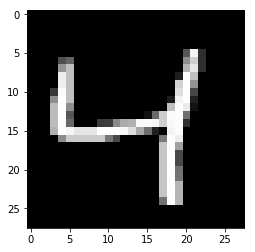

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [5]:
img.shape

(784,)

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [25]:
hidden_units = 20
images_units = 784

# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, images_units), name="input")
targets_ = tf.placeholder(tf.float32, (None), name="target")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, hidden_units, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, images_units)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(
    labels=targets_,
    logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [26]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [27]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6900
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6819
Epoch: 1/20... Training loss: 0.6775
Epoch: 1/20... Training loss: 0.6724
Epoch: 1/20... Training loss: 0.6679
Epoch: 1/20... Training loss: 0.6606
Epoch: 1/20... Training loss: 0.6533
Epoch: 1/20... Training loss: 0.6457
Epoch: 1/20... Training loss: 0.6378
Epoch: 1/20... Training loss: 0.6268
Epoch: 1/20... Training loss: 0.6153
Epoch: 1/20... Training loss: 0.6060
Epoch: 1/20... Training loss: 0.5910
Epoch: 1/20... Training loss: 0.5823
Epoch: 1/20... Training loss: 0.5659
Epoch: 1/20... Training loss: 0.5493
Epoch: 1/20... Training loss: 0.5370
Epoch: 1/20... Training loss: 0.5236
Epoch: 1/20... Training loss: 0.5085
Epoch: 1/20... Training loss: 0.4903
Epoch: 1/20... Training loss: 0.4787
Epoch: 1/20... Training loss: 0.4658
Epoch: 1/20... Training loss: 0.4514
E

Epoch: 1/20... Training loss: 0.2144
Epoch: 1/20... Training loss: 0.2130
Epoch: 1/20... Training loss: 0.2167
Epoch: 1/20... Training loss: 0.2143
Epoch: 1/20... Training loss: 0.2076
Epoch: 1/20... Training loss: 0.2143
Epoch: 1/20... Training loss: 0.2099
Epoch: 1/20... Training loss: 0.2123
Epoch: 1/20... Training loss: 0.2124
Epoch: 1/20... Training loss: 0.2131
Epoch: 1/20... Training loss: 0.2105
Epoch: 1/20... Training loss: 0.2089
Epoch: 1/20... Training loss: 0.2138
Epoch: 1/20... Training loss: 0.2112
Epoch: 1/20... Training loss: 0.2075
Epoch: 1/20... Training loss: 0.2077
Epoch: 1/20... Training loss: 0.2056
Epoch: 1/20... Training loss: 0.2118
Epoch: 1/20... Training loss: 0.2032
Epoch: 1/20... Training loss: 0.2089
Epoch: 1/20... Training loss: 0.2046
Epoch: 1/20... Training loss: 0.2102
Epoch: 1/20... Training loss: 0.2054
Epoch: 1/20... Training loss: 0.2027
Epoch: 1/20... Training loss: 0.2094
Epoch: 1/20... Training loss: 0.2055
Epoch: 1/20... Training loss: 0.2042
E

Epoch: 2/20... Training loss: 0.1737
Epoch: 2/20... Training loss: 0.1784
Epoch: 2/20... Training loss: 0.1764
Epoch: 2/20... Training loss: 0.1748
Epoch: 2/20... Training loss: 0.1674
Epoch: 2/20... Training loss: 0.1770
Epoch: 2/20... Training loss: 0.1749
Epoch: 2/20... Training loss: 0.1726
Epoch: 2/20... Training loss: 0.1731
Epoch: 2/20... Training loss: 0.1668
Epoch: 2/20... Training loss: 0.1748
Epoch: 2/20... Training loss: 0.1754
Epoch: 2/20... Training loss: 0.1675
Epoch: 2/20... Training loss: 0.1800
Epoch: 2/20... Training loss: 0.1758
Epoch: 2/20... Training loss: 0.1736
Epoch: 2/20... Training loss: 0.1728
Epoch: 2/20... Training loss: 0.1764
Epoch: 2/20... Training loss: 0.1731
Epoch: 2/20... Training loss: 0.1750
Epoch: 2/20... Training loss: 0.1742
Epoch: 2/20... Training loss: 0.1712
Epoch: 2/20... Training loss: 0.1742
Epoch: 2/20... Training loss: 0.1778
Epoch: 2/20... Training loss: 0.1736
Epoch: 2/20... Training loss: 0.1780
Epoch: 2/20... Training loss: 0.1741
E

Epoch: 3/20... Training loss: 0.1527
Epoch: 3/20... Training loss: 0.1564
Epoch: 3/20... Training loss: 0.1548
Epoch: 3/20... Training loss: 0.1504
Epoch: 3/20... Training loss: 0.1585
Epoch: 3/20... Training loss: 0.1546
Epoch: 3/20... Training loss: 0.1477
Epoch: 3/20... Training loss: 0.1557
Epoch: 3/20... Training loss: 0.1536
Epoch: 3/20... Training loss: 0.1569
Epoch: 3/20... Training loss: 0.1489
Epoch: 3/20... Training loss: 0.1528
Epoch: 3/20... Training loss: 0.1526
Epoch: 3/20... Training loss: 0.1564
Epoch: 3/20... Training loss: 0.1575
Epoch: 3/20... Training loss: 0.1493
Epoch: 3/20... Training loss: 0.1575
Epoch: 3/20... Training loss: 0.1557
Epoch: 3/20... Training loss: 0.1588
Epoch: 3/20... Training loss: 0.1610
Epoch: 3/20... Training loss: 0.1549
Epoch: 3/20... Training loss: 0.1509
Epoch: 3/20... Training loss: 0.1549
Epoch: 3/20... Training loss: 0.1520
Epoch: 3/20... Training loss: 0.1554
Epoch: 3/20... Training loss: 0.1521
Epoch: 3/20... Training loss: 0.1525
E

Epoch: 4/20... Training loss: 0.1408
Epoch: 4/20... Training loss: 0.1478
Epoch: 4/20... Training loss: 0.1453
Epoch: 4/20... Training loss: 0.1439
Epoch: 4/20... Training loss: 0.1482
Epoch: 4/20... Training loss: 0.1424
Epoch: 4/20... Training loss: 0.1412
Epoch: 4/20... Training loss: 0.1502
Epoch: 4/20... Training loss: 0.1499
Epoch: 4/20... Training loss: 0.1448
Epoch: 4/20... Training loss: 0.1441
Epoch: 4/20... Training loss: 0.1412
Epoch: 4/20... Training loss: 0.1419
Epoch: 4/20... Training loss: 0.1512
Epoch: 4/20... Training loss: 0.1451
Epoch: 4/20... Training loss: 0.1402
Epoch: 4/20... Training loss: 0.1438
Epoch: 4/20... Training loss: 0.1406
Epoch: 4/20... Training loss: 0.1463
Epoch: 4/20... Training loss: 0.1418
Epoch: 4/20... Training loss: 0.1448
Epoch: 4/20... Training loss: 0.1425
Epoch: 4/20... Training loss: 0.1416
Epoch: 4/20... Training loss: 0.1432
Epoch: 4/20... Training loss: 0.1471
Epoch: 4/20... Training loss: 0.1454
Epoch: 4/20... Training loss: 0.1456
E

Epoch: 4/20... Training loss: 0.1437
Epoch: 4/20... Training loss: 0.1403
Epoch: 4/20... Training loss: 0.1339
Epoch: 4/20... Training loss: 0.1372
Epoch: 4/20... Training loss: 0.1402
Epoch: 4/20... Training loss: 0.1378
Epoch: 4/20... Training loss: 0.1361
Epoch: 4/20... Training loss: 0.1316
Epoch: 4/20... Training loss: 0.1378
Epoch: 4/20... Training loss: 0.1388
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1365
Epoch: 5/20... Training loss: 0.1360
Epoch: 5/20... Training loss: 0.1310
Epoch: 5/20... Training loss: 0.1361
Epoch: 5/20... Training loss: 0.1322
Epoch: 5/20... Training loss: 0.1405
Epoch: 5/20... Training loss: 0.1426
Epoch: 5/20... Training loss: 0.1363
Epoch: 5/20... Training loss: 0.1335
Epoch: 5/20... Training loss: 0.1306
Epoch: 5/20... Training loss: 0.1350
Epoch: 5/20... Training loss: 0.1353
Epoch: 5/20... Training loss: 0.1360
Epoch: 5/20... Training loss: 0.1372
Epoch: 5/20... Training loss: 0.1408
Epoch: 5/20... Training loss: 0.1380
E

Epoch: 5/20... Training loss: 0.1284
Epoch: 5/20... Training loss: 0.1268
Epoch: 5/20... Training loss: 0.1314
Epoch: 5/20... Training loss: 0.1341
Epoch: 5/20... Training loss: 0.1352
Epoch: 5/20... Training loss: 0.1279
Epoch: 5/20... Training loss: 0.1276
Epoch: 5/20... Training loss: 0.1353
Epoch: 5/20... Training loss: 0.1297
Epoch: 5/20... Training loss: 0.1278
Epoch: 5/20... Training loss: 0.1299
Epoch: 5/20... Training loss: 0.1320
Epoch: 5/20... Training loss: 0.1318
Epoch: 5/20... Training loss: 0.1332
Epoch: 5/20... Training loss: 0.1331
Epoch: 5/20... Training loss: 0.1255
Epoch: 5/20... Training loss: 0.1323
Epoch: 5/20... Training loss: 0.1336
Epoch: 5/20... Training loss: 0.1314
Epoch: 5/20... Training loss: 0.1255
Epoch: 5/20... Training loss: 0.1342
Epoch: 5/20... Training loss: 0.1299
Epoch: 5/20... Training loss: 0.1308
Epoch: 5/20... Training loss: 0.1332
Epoch: 5/20... Training loss: 0.1298
Epoch: 5/20... Training loss: 0.1331
Epoch: 5/20... Training loss: 0.1319
E

Epoch: 6/20... Training loss: 0.1320
Epoch: 6/20... Training loss: 0.1318
Epoch: 6/20... Training loss: 0.1258
Epoch: 6/20... Training loss: 0.1259
Epoch: 6/20... Training loss: 0.1276
Epoch: 6/20... Training loss: 0.1309
Epoch: 6/20... Training loss: 0.1204
Epoch: 6/20... Training loss: 0.1256
Epoch: 6/20... Training loss: 0.1301
Epoch: 6/20... Training loss: 0.1221
Epoch: 6/20... Training loss: 0.1303
Epoch: 6/20... Training loss: 0.1299
Epoch: 6/20... Training loss: 0.1262
Epoch: 6/20... Training loss: 0.1238
Epoch: 6/20... Training loss: 0.1277
Epoch: 6/20... Training loss: 0.1255
Epoch: 6/20... Training loss: 0.1254
Epoch: 6/20... Training loss: 0.1309
Epoch: 6/20... Training loss: 0.1290
Epoch: 6/20... Training loss: 0.1187
Epoch: 6/20... Training loss: 0.1291
Epoch: 6/20... Training loss: 0.1283
Epoch: 6/20... Training loss: 0.1253
Epoch: 6/20... Training loss: 0.1266
Epoch: 6/20... Training loss: 0.1260
Epoch: 6/20... Training loss: 0.1232
Epoch: 6/20... Training loss: 0.1315
E

Epoch: 7/20... Training loss: 0.1253
Epoch: 7/20... Training loss: 0.1283
Epoch: 7/20... Training loss: 0.1279
Epoch: 7/20... Training loss: 0.1288
Epoch: 7/20... Training loss: 0.1298
Epoch: 7/20... Training loss: 0.1262
Epoch: 7/20... Training loss: 0.1287
Epoch: 7/20... Training loss: 0.1240
Epoch: 7/20... Training loss: 0.1285
Epoch: 7/20... Training loss: 0.1305
Epoch: 7/20... Training loss: 0.1293
Epoch: 7/20... Training loss: 0.1253
Epoch: 7/20... Training loss: 0.1243
Epoch: 7/20... Training loss: 0.1265
Epoch: 7/20... Training loss: 0.1271
Epoch: 7/20... Training loss: 0.1291
Epoch: 7/20... Training loss: 0.1242
Epoch: 7/20... Training loss: 0.1282
Epoch: 7/20... Training loss: 0.1248
Epoch: 7/20... Training loss: 0.1237
Epoch: 7/20... Training loss: 0.1229
Epoch: 7/20... Training loss: 0.1248
Epoch: 7/20... Training loss: 0.1280
Epoch: 7/20... Training loss: 0.1230
Epoch: 7/20... Training loss: 0.1259
Epoch: 7/20... Training loss: 0.1250
Epoch: 7/20... Training loss: 0.1269
E

Epoch: 8/20... Training loss: 0.1257
Epoch: 8/20... Training loss: 0.1296
Epoch: 8/20... Training loss: 0.1217
Epoch: 8/20... Training loss: 0.1202
Epoch: 8/20... Training loss: 0.1270
Epoch: 8/20... Training loss: 0.1229
Epoch: 8/20... Training loss: 0.1231
Epoch: 8/20... Training loss: 0.1266
Epoch: 8/20... Training loss: 0.1175
Epoch: 8/20... Training loss: 0.1248
Epoch: 8/20... Training loss: 0.1251
Epoch: 8/20... Training loss: 0.1229
Epoch: 8/20... Training loss: 0.1253
Epoch: 8/20... Training loss: 0.1220
Epoch: 8/20... Training loss: 0.1242
Epoch: 8/20... Training loss: 0.1285
Epoch: 8/20... Training loss: 0.1229
Epoch: 8/20... Training loss: 0.1238
Epoch: 8/20... Training loss: 0.1229
Epoch: 8/20... Training loss: 0.1199
Epoch: 8/20... Training loss: 0.1218
Epoch: 8/20... Training loss: 0.1220
Epoch: 8/20... Training loss: 0.1220
Epoch: 8/20... Training loss: 0.1168
Epoch: 8/20... Training loss: 0.1212
Epoch: 8/20... Training loss: 0.1292
Epoch: 8/20... Training loss: 0.1195
E

Epoch: 8/20... Training loss: 0.1193
Epoch: 8/20... Training loss: 0.1230
Epoch: 8/20... Training loss: 0.1183
Epoch: 8/20... Training loss: 0.1224
Epoch: 8/20... Training loss: 0.1275
Epoch: 8/20... Training loss: 0.1214
Epoch: 8/20... Training loss: 0.1241
Epoch: 8/20... Training loss: 0.1182
Epoch: 8/20... Training loss: 0.1256
Epoch: 8/20... Training loss: 0.1242
Epoch: 8/20... Training loss: 0.1165
Epoch: 8/20... Training loss: 0.1207
Epoch: 8/20... Training loss: 0.1197
Epoch: 8/20... Training loss: 0.1299
Epoch: 8/20... Training loss: 0.1207
Epoch: 8/20... Training loss: 0.1141
Epoch: 8/20... Training loss: 0.1201
Epoch: 8/20... Training loss: 0.1228
Epoch: 8/20... Training loss: 0.1231
Epoch: 8/20... Training loss: 0.1210
Epoch: 8/20... Training loss: 0.1198
Epoch: 8/20... Training loss: 0.1221
Epoch: 8/20... Training loss: 0.1171
Epoch: 8/20... Training loss: 0.1233
Epoch: 8/20... Training loss: 0.1227
Epoch: 8/20... Training loss: 0.1214
Epoch: 8/20... Training loss: 0.1216
E

Epoch: 9/20... Training loss: 0.1264
Epoch: 9/20... Training loss: 0.1216
Epoch: 9/20... Training loss: 0.1198
Epoch: 9/20... Training loss: 0.1172
Epoch: 9/20... Training loss: 0.1201
Epoch: 9/20... Training loss: 0.1207
Epoch: 9/20... Training loss: 0.1182
Epoch: 9/20... Training loss: 0.1271
Epoch: 9/20... Training loss: 0.1255
Epoch: 9/20... Training loss: 0.1233
Epoch: 9/20... Training loss: 0.1182
Epoch: 9/20... Training loss: 0.1237
Epoch: 9/20... Training loss: 0.1234
Epoch: 9/20... Training loss: 0.1189
Epoch: 9/20... Training loss: 0.1218
Epoch: 9/20... Training loss: 0.1199
Epoch: 9/20... Training loss: 0.1201
Epoch: 9/20... Training loss: 0.1236
Epoch: 9/20... Training loss: 0.1202
Epoch: 9/20... Training loss: 0.1175
Epoch: 9/20... Training loss: 0.1191
Epoch: 9/20... Training loss: 0.1178
Epoch: 9/20... Training loss: 0.1265
Epoch: 9/20... Training loss: 0.1152
Epoch: 9/20... Training loss: 0.1182
Epoch: 9/20... Training loss: 0.1217
Epoch: 9/20... Training loss: 0.1179
E

Epoch: 10/20... Training loss: 0.1171
Epoch: 10/20... Training loss: 0.1219
Epoch: 10/20... Training loss: 0.1200
Epoch: 10/20... Training loss: 0.1193
Epoch: 10/20... Training loss: 0.1208
Epoch: 10/20... Training loss: 0.1142
Epoch: 10/20... Training loss: 0.1170
Epoch: 10/20... Training loss: 0.1217
Epoch: 10/20... Training loss: 0.1173
Epoch: 10/20... Training loss: 0.1160
Epoch: 10/20... Training loss: 0.1180
Epoch: 10/20... Training loss: 0.1206
Epoch: 10/20... Training loss: 0.1220
Epoch: 10/20... Training loss: 0.1187
Epoch: 10/20... Training loss: 0.1253
Epoch: 10/20... Training loss: 0.1194
Epoch: 10/20... Training loss: 0.1193
Epoch: 10/20... Training loss: 0.1192
Epoch: 10/20... Training loss: 0.1189
Epoch: 10/20... Training loss: 0.1214
Epoch: 10/20... Training loss: 0.1202
Epoch: 10/20... Training loss: 0.1197
Epoch: 10/20... Training loss: 0.1219
Epoch: 10/20... Training loss: 0.1203
Epoch: 10/20... Training loss: 0.1186
Epoch: 10/20... Training loss: 0.1220
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1196
Epoch: 11/20... Training loss: 0.1164
Epoch: 11/20... Training loss: 0.1171
Epoch: 11/20... Training loss: 0.1201
Epoch: 11/20... Training loss: 0.1173
Epoch: 11/20... Training loss: 0.1187
Epoch: 11/20... Training loss: 0.1197
Epoch: 11/20... Training loss: 0.1214
Epoch: 11/20... Training loss: 0.1218
Epoch: 11/20... Training loss: 0.1157
Epoch: 11/20... Training loss: 0.1170
Epoch: 11/20... Training loss: 0.1164
Epoch: 11/20... Training loss: 0.1209
Epoch: 11/20... Training loss: 0.1210
Epoch: 11/20... Training loss: 0.1181
Epoch: 11/20... Training loss: 0.1195
Epoch: 11/20... Training loss: 0.1199
Epoch: 11/20... Training loss: 0.1178
Epoch: 11/20... Training loss: 0.1177
Epoch: 11/20... Training loss: 0.1190
Epoch: 11/20... Training loss: 0.1127
Epoch: 11/20... Training loss: 0.1198
Epoch: 11/20... Training loss: 0.1206
Epoch: 11/20... Training loss: 0.1145
Epoch: 11/20... Training loss: 0.1171
Epoch: 11/20... Training loss: 0.1226
Epoch: 11/20

Epoch: 11/20... Training loss: 0.1209
Epoch: 11/20... Training loss: 0.1170
Epoch: 11/20... Training loss: 0.1191
Epoch: 11/20... Training loss: 0.1209
Epoch: 11/20... Training loss: 0.1206
Epoch: 11/20... Training loss: 0.1162
Epoch: 11/20... Training loss: 0.1184
Epoch: 11/20... Training loss: 0.1177
Epoch: 11/20... Training loss: 0.1224
Epoch: 11/20... Training loss: 0.1180
Epoch: 11/20... Training loss: 0.1135
Epoch: 11/20... Training loss: 0.1176
Epoch: 11/20... Training loss: 0.1183
Epoch: 11/20... Training loss: 0.1186
Epoch: 11/20... Training loss: 0.1180
Epoch: 12/20... Training loss: 0.1140
Epoch: 12/20... Training loss: 0.1192
Epoch: 12/20... Training loss: 0.1157
Epoch: 12/20... Training loss: 0.1233
Epoch: 12/20... Training loss: 0.1156
Epoch: 12/20... Training loss: 0.1216
Epoch: 12/20... Training loss: 0.1214
Epoch: 12/20... Training loss: 0.1222
Epoch: 12/20... Training loss: 0.1144
Epoch: 12/20... Training loss: 0.1165
Epoch: 12/20... Training loss: 0.1143
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1135
Epoch: 12/20... Training loss: 0.1154
Epoch: 12/20... Training loss: 0.1152
Epoch: 12/20... Training loss: 0.1176
Epoch: 12/20... Training loss: 0.1135
Epoch: 12/20... Training loss: 0.1157
Epoch: 12/20... Training loss: 0.1118
Epoch: 12/20... Training loss: 0.1205
Epoch: 12/20... Training loss: 0.1135
Epoch: 12/20... Training loss: 0.1152
Epoch: 12/20... Training loss: 0.1166
Epoch: 12/20... Training loss: 0.1170
Epoch: 12/20... Training loss: 0.1178
Epoch: 12/20... Training loss: 0.1206
Epoch: 12/20... Training loss: 0.1257
Epoch: 12/20... Training loss: 0.1155
Epoch: 12/20... Training loss: 0.1154
Epoch: 12/20... Training loss: 0.1146
Epoch: 12/20... Training loss: 0.1137
Epoch: 12/20... Training loss: 0.1196
Epoch: 12/20... Training loss: 0.1186
Epoch: 12/20... Training loss: 0.1169
Epoch: 12/20... Training loss: 0.1221
Epoch: 12/20... Training loss: 0.1196
Epoch: 12/20... Training loss: 0.1208
Epoch: 12/20... Training loss: 0.1196
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1164
Epoch: 13/20... Training loss: 0.1130
Epoch: 13/20... Training loss: 0.1158
Epoch: 13/20... Training loss: 0.1206
Epoch: 13/20... Training loss: 0.1139
Epoch: 13/20... Training loss: 0.1136
Epoch: 13/20... Training loss: 0.1197
Epoch: 13/20... Training loss: 0.1138
Epoch: 13/20... Training loss: 0.1228
Epoch: 13/20... Training loss: 0.1209
Epoch: 13/20... Training loss: 0.1181
Epoch: 13/20... Training loss: 0.1202
Epoch: 13/20... Training loss: 0.1176
Epoch: 13/20... Training loss: 0.1206
Epoch: 13/20... Training loss: 0.1207
Epoch: 13/20... Training loss: 0.1172
Epoch: 13/20... Training loss: 0.1152
Epoch: 13/20... Training loss: 0.1120
Epoch: 13/20... Training loss: 0.1194
Epoch: 13/20... Training loss: 0.1163
Epoch: 13/20... Training loss: 0.1170
Epoch: 13/20... Training loss: 0.1151
Epoch: 13/20... Training loss: 0.1181
Epoch: 13/20... Training loss: 0.1161
Epoch: 13/20... Training loss: 0.1163
Epoch: 13/20... Training loss: 0.1152
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1145
Epoch: 14/20... Training loss: 0.1176
Epoch: 14/20... Training loss: 0.1115
Epoch: 14/20... Training loss: 0.1187
Epoch: 14/20... Training loss: 0.1142
Epoch: 14/20... Training loss: 0.1169
Epoch: 14/20... Training loss: 0.1169
Epoch: 14/20... Training loss: 0.1146
Epoch: 14/20... Training loss: 0.1144
Epoch: 14/20... Training loss: 0.1206
Epoch: 14/20... Training loss: 0.1183
Epoch: 14/20... Training loss: 0.1147
Epoch: 14/20... Training loss: 0.1178
Epoch: 14/20... Training loss: 0.1142
Epoch: 14/20... Training loss: 0.1191
Epoch: 14/20... Training loss: 0.1092
Epoch: 14/20... Training loss: 0.1188
Epoch: 14/20... Training loss: 0.1186
Epoch: 14/20... Training loss: 0.1144
Epoch: 14/20... Training loss: 0.1166
Epoch: 14/20... Training loss: 0.1175
Epoch: 14/20... Training loss: 0.1183
Epoch: 14/20... Training loss: 0.1223
Epoch: 14/20... Training loss: 0.1152
Epoch: 14/20... Training loss: 0.1138
Epoch: 14/20... Training loss: 0.1208
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1161
Epoch: 14/20... Training loss: 0.1199
Epoch: 14/20... Training loss: 0.1139
Epoch: 14/20... Training loss: 0.1182
Epoch: 14/20... Training loss: 0.1155
Epoch: 14/20... Training loss: 0.1087
Epoch: 15/20... Training loss: 0.1140
Epoch: 15/20... Training loss: 0.1236
Epoch: 15/20... Training loss: 0.1148
Epoch: 15/20... Training loss: 0.1133
Epoch: 15/20... Training loss: 0.1154
Epoch: 15/20... Training loss: 0.1179
Epoch: 15/20... Training loss: 0.1162
Epoch: 15/20... Training loss: 0.1184
Epoch: 15/20... Training loss: 0.1194
Epoch: 15/20... Training loss: 0.1186
Epoch: 15/20... Training loss: 0.1157
Epoch: 15/20... Training loss: 0.1202
Epoch: 15/20... Training loss: 0.1146
Epoch: 15/20... Training loss: 0.1176
Epoch: 15/20... Training loss: 0.1165
Epoch: 15/20... Training loss: 0.1124
Epoch: 15/20... Training loss: 0.1201
Epoch: 15/20... Training loss: 0.1141
Epoch: 15/20... Training loss: 0.1102
Epoch: 15/20... Training loss: 0.1219
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1063
Epoch: 15/20... Training loss: 0.1147
Epoch: 15/20... Training loss: 0.1162
Epoch: 15/20... Training loss: 0.1168
Epoch: 15/20... Training loss: 0.1218
Epoch: 15/20... Training loss: 0.1165
Epoch: 15/20... Training loss: 0.1156
Epoch: 15/20... Training loss: 0.1164
Epoch: 15/20... Training loss: 0.1165
Epoch: 15/20... Training loss: 0.1144
Epoch: 15/20... Training loss: 0.1191
Epoch: 15/20... Training loss: 0.1178
Epoch: 15/20... Training loss: 0.1198
Epoch: 15/20... Training loss: 0.1130
Epoch: 15/20... Training loss: 0.1184
Epoch: 15/20... Training loss: 0.1186
Epoch: 15/20... Training loss: 0.1167
Epoch: 15/20... Training loss: 0.1148
Epoch: 15/20... Training loss: 0.1180
Epoch: 15/20... Training loss: 0.1163
Epoch: 15/20... Training loss: 0.1136
Epoch: 15/20... Training loss: 0.1206
Epoch: 15/20... Training loss: 0.1183
Epoch: 15/20... Training loss: 0.1173
Epoch: 15/20... Training loss: 0.1177
Epoch: 15/20... Training loss: 0.1169
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1155
Epoch: 16/20... Training loss: 0.1176
Epoch: 16/20... Training loss: 0.1174
Epoch: 16/20... Training loss: 0.1173
Epoch: 16/20... Training loss: 0.1125
Epoch: 16/20... Training loss: 0.1143
Epoch: 16/20... Training loss: 0.1182
Epoch: 16/20... Training loss: 0.1186
Epoch: 16/20... Training loss: 0.1190
Epoch: 16/20... Training loss: 0.1139
Epoch: 16/20... Training loss: 0.1193
Epoch: 16/20... Training loss: 0.1192
Epoch: 16/20... Training loss: 0.1185
Epoch: 16/20... Training loss: 0.1157
Epoch: 16/20... Training loss: 0.1188
Epoch: 16/20... Training loss: 0.1199
Epoch: 16/20... Training loss: 0.1153
Epoch: 16/20... Training loss: 0.1141
Epoch: 16/20... Training loss: 0.1134
Epoch: 16/20... Training loss: 0.1191
Epoch: 16/20... Training loss: 0.1194
Epoch: 16/20... Training loss: 0.1180
Epoch: 16/20... Training loss: 0.1118
Epoch: 16/20... Training loss: 0.1157
Epoch: 16/20... Training loss: 0.1149
Epoch: 16/20... Training loss: 0.1159
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1175
Epoch: 17/20... Training loss: 0.1163
Epoch: 17/20... Training loss: 0.1140
Epoch: 17/20... Training loss: 0.1118
Epoch: 17/20... Training loss: 0.1187
Epoch: 17/20... Training loss: 0.1150
Epoch: 17/20... Training loss: 0.1199
Epoch: 17/20... Training loss: 0.1186
Epoch: 17/20... Training loss: 0.1151
Epoch: 17/20... Training loss: 0.1133
Epoch: 17/20... Training loss: 0.1170
Epoch: 17/20... Training loss: 0.1153
Epoch: 17/20... Training loss: 0.1238
Epoch: 17/20... Training loss: 0.1200
Epoch: 17/20... Training loss: 0.1164
Epoch: 17/20... Training loss: 0.1191
Epoch: 17/20... Training loss: 0.1156
Epoch: 17/20... Training loss: 0.1146
Epoch: 17/20... Training loss: 0.1129
Epoch: 17/20... Training loss: 0.1147
Epoch: 17/20... Training loss: 0.1169
Epoch: 17/20... Training loss: 0.1144
Epoch: 17/20... Training loss: 0.1162
Epoch: 17/20... Training loss: 0.1150
Epoch: 17/20... Training loss: 0.1156
Epoch: 17/20... Training loss: 0.1148
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1212
Epoch: 18/20... Training loss: 0.1217
Epoch: 18/20... Training loss: 0.1143
Epoch: 18/20... Training loss: 0.1099
Epoch: 18/20... Training loss: 0.1201
Epoch: 18/20... Training loss: 0.1168
Epoch: 18/20... Training loss: 0.1190
Epoch: 18/20... Training loss: 0.1198
Epoch: 18/20... Training loss: 0.1208
Epoch: 18/20... Training loss: 0.1210
Epoch: 18/20... Training loss: 0.1161
Epoch: 18/20... Training loss: 0.1130
Epoch: 18/20... Training loss: 0.1185
Epoch: 18/20... Training loss: 0.1181
Epoch: 18/20... Training loss: 0.1136
Epoch: 18/20... Training loss: 0.1146
Epoch: 18/20... Training loss: 0.1195
Epoch: 18/20... Training loss: 0.1157
Epoch: 18/20... Training loss: 0.1163
Epoch: 18/20... Training loss: 0.1158
Epoch: 18/20... Training loss: 0.1185
Epoch: 18/20... Training loss: 0.1188
Epoch: 18/20... Training loss: 0.1162
Epoch: 18/20... Training loss: 0.1150
Epoch: 18/20... Training loss: 0.1158
Epoch: 18/20... Training loss: 0.1176
Epoch: 18/20

Epoch: 18/20... Training loss: 0.1165
Epoch: 18/20... Training loss: 0.1131
Epoch: 18/20... Training loss: 0.1198
Epoch: 18/20... Training loss: 0.1154
Epoch: 18/20... Training loss: 0.1173
Epoch: 18/20... Training loss: 0.1105
Epoch: 18/20... Training loss: 0.1131
Epoch: 18/20... Training loss: 0.1143
Epoch: 18/20... Training loss: 0.1164
Epoch: 18/20... Training loss: 0.1133
Epoch: 18/20... Training loss: 0.1215
Epoch: 18/20... Training loss: 0.1153
Epoch: 18/20... Training loss: 0.1152
Epoch: 18/20... Training loss: 0.1165
Epoch: 18/20... Training loss: 0.1251
Epoch: 18/20... Training loss: 0.1113
Epoch: 18/20... Training loss: 0.1134
Epoch: 18/20... Training loss: 0.1189
Epoch: 18/20... Training loss: 0.1166
Epoch: 18/20... Training loss: 0.1161
Epoch: 18/20... Training loss: 0.1167
Epoch: 18/20... Training loss: 0.1107
Epoch: 18/20... Training loss: 0.1164
Epoch: 18/20... Training loss: 0.1143
Epoch: 18/20... Training loss: 0.1242
Epoch: 18/20... Training loss: 0.1166
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1226
Epoch: 19/20... Training loss: 0.1143
Epoch: 19/20... Training loss: 0.1130
Epoch: 19/20... Training loss: 0.1156
Epoch: 19/20... Training loss: 0.1171
Epoch: 19/20... Training loss: 0.1178
Epoch: 19/20... Training loss: 0.1161
Epoch: 19/20... Training loss: 0.1178
Epoch: 19/20... Training loss: 0.1147
Epoch: 19/20... Training loss: 0.1158
Epoch: 19/20... Training loss: 0.1176
Epoch: 19/20... Training loss: 0.1178
Epoch: 19/20... Training loss: 0.1185
Epoch: 19/20... Training loss: 0.1161
Epoch: 19/20... Training loss: 0.1165
Epoch: 19/20... Training loss: 0.1198
Epoch: 19/20... Training loss: 0.1153
Epoch: 19/20... Training loss: 0.1193
Epoch: 19/20... Training loss: 0.1148
Epoch: 19/20... Training loss: 0.1151
Epoch: 19/20... Training loss: 0.1186
Epoch: 19/20... Training loss: 0.1145
Epoch: 19/20... Training loss: 0.1122
Epoch: 19/20... Training loss: 0.1173
Epoch: 19/20... Training loss: 0.1164
Epoch: 19/20... Training loss: 0.1195
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1174
Epoch: 20/20... Training loss: 0.1159
Epoch: 20/20... Training loss: 0.1160
Epoch: 20/20... Training loss: 0.1134
Epoch: 20/20... Training loss: 0.1202
Epoch: 20/20... Training loss: 0.1185
Epoch: 20/20... Training loss: 0.1161
Epoch: 20/20... Training loss: 0.1129
Epoch: 20/20... Training loss: 0.1184
Epoch: 20/20... Training loss: 0.1185
Epoch: 20/20... Training loss: 0.1202
Epoch: 20/20... Training loss: 0.1107
Epoch: 20/20... Training loss: 0.1171
Epoch: 20/20... Training loss: 0.1199
Epoch: 20/20... Training loss: 0.1161
Epoch: 20/20... Training loss: 0.1157
Epoch: 20/20... Training loss: 0.1172
Epoch: 20/20... Training loss: 0.1156
Epoch: 20/20... Training loss: 0.1106
Epoch: 20/20... Training loss: 0.1164
Epoch: 20/20... Training loss: 0.1143
Epoch: 20/20... Training loss: 0.1158
Epoch: 20/20... Training loss: 0.1164
Epoch: 20/20... Training loss: 0.1115
Epoch: 20/20... Training loss: 0.1185
Epoch: 20/20... Training loss: 0.1139
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

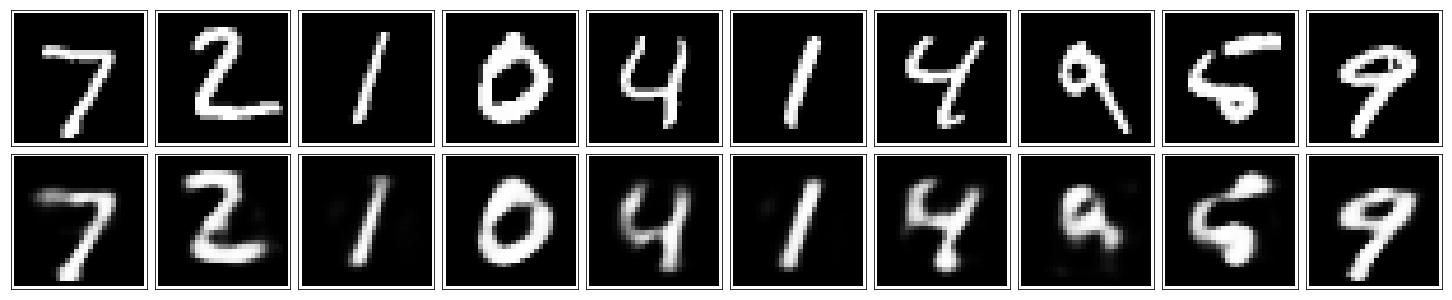

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [29]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.